# 숭실대학교 베어드 교양대학 공개강의 자료  ::  김선영 #

## [ Linear Regression : 선형회귀 ] ##

### 1. Scikit-Learn을 사용하지 않고 구현하기

## 1단계 : 라이브러리 불러오기

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 2단계 : 자료 불러오기 & 행렬 만들기

In [2]:
my_data = np.genfromtxt('data.csv',delimiter=',') # read the data
X = my_data[:, 0].reshape(-1,1) # -1 tells numpy to figure out the dimension by itself
ones = np.ones([X.shape[0], 1]) # create a array containing only ones 
X = np.concatenate([ones, X],1) # cocatenate the ones to X matrix
y = my_data[:, 1].reshape(-1,1) # create the y matrix

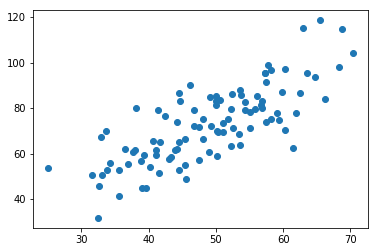

In [3]:
plt.scatter(my_data[:,0].reshape(-1,1),y)

직관적으로 선형의 형태를 나타냄을 알 수 있다. 

## 3단계 : 파라미터 설정하기

가설을 설정하기 위해 일차 방정식 H(x) = wx + b를 생각해보자. 아래의 alpha와 iters는 각각 learning rate과 학습수를 의미한다.

In [4]:
alpha = 0.0001
iters = 1000

In [5]:
bw = np.array([[1.0, 1.0]])

## 4단계 : 비용함수(Cost Function) 만들기

In [6]:
def computeCost(X, y, bw):
    err = np.power(((X @ bw.T) - y), 2) 
    return np.sum(err) / (2 * len(X))

@는 배열의 행렬곱을 의미한다. * 연산자를 사용하기 위해서는 배열을 행렬로 변환하는 작업이 필요하다.

err는 1차 방정식 H(x)에 데이터를 입력했을때 나오는 예측값과 데이터의 y값과의 차이의 제곱을 의미한다.

In [7]:
computeCost(X, y, bw) 

319.40631589398157

리턴되는 cost 값이 크다. 코스트를 줄여보도록 하자.

## 5단계 : 경사줄이기 방법 (Gradient Descent function) ##

In [8]:
def gradientDescent(X, y, bw, alpha, iters):
    for i in range(iters):
        bw = bw - (alpha/len(X)) * np.sum((X @ bw.T - y) * X, axis=0)
        cost = computeCost(X, y, bw)
    return (bw, cost)

In [9]:
grad_bw, cost = gradientDescent(X, y, bw, alpha, iters)

In [10]:
print(grad_bw, cost)

[[1.03533399 1.45914293]] 56.0419737779817


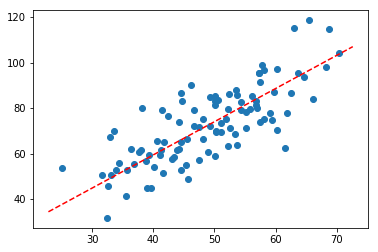

In [11]:
plt.scatter(my_data[:, 0].reshape(-1,1), y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim()) 
y_vals = grad_bw[0][0] + grad_bw[0][1]* x_vals 
plt.plot(x_vals, y_vals, '--r')

In [12]:
def linreg1(x) :
    ft = grad_bw[0][0] + grad_bw[0][1] * x
    return ft
linreg1(30),linreg1(64)

(44.80962192706136, 94.42048159206928)

### 2. Scikit-Learn 패키지를 활용하기.

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
h=np.dot(X, np.array([0, 1])) + 1.35

In [14]:
reg = LinearRegression().fit(X, h)
reg.score(X, h)

1.0

In [15]:
sk_bw = reg.coef_[1] , reg.intercept_

In [16]:
print(sk_bw)

(0.9999999999999997, 1.349999999999973)


In [17]:
reg.predict(np.array([[2, 5]]))

array([6.35])

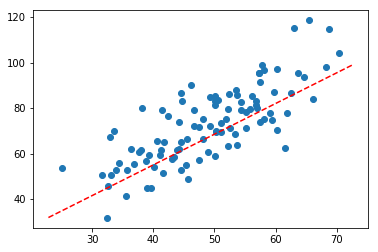

In [18]:
plt.scatter(my_data[:, 0].reshape(-1,1), y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim()) 
y_vals = reg.coef_[1] + reg.intercept_* x_vals 
plt.plot(x_vals, y_vals, '--r')

In [22]:
def linreg2(x) :
    ft2 = reg.coef_[1] + reg.intercept_* x
    return ft2
linreg2(30),linreg2(64)

(41.49999999999919, 87.39999999999827)